In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [11]:
stations_info = pd.read_csv("stations_info.csv")

In [12]:
# cities = ["Bengaluru","Kochi","Hyderabad","Chennai","Mumbai","Lucknow","Kolkata","Guwahati","Delhi","Chandigarh","Amritsar","Ahmedabad"]
cities = ["Thiruvananthapuram"]

df = stations_info[stations_info['city'].isin(cities)]

city_to_files = df.groupby('city')['file_name'].apply(list).to_dict()

for city,files in city_to_files.items():
    print(files)
    print("\n")

['KL001', 'KL006']




In [ ]:
print(stations_info["city"].nunique())

In [14]:
for city,files in city_to_files.items():
    print(f"Processing files for city: {city}")

    city_dataframes = []

    for file in files:
        try:
            # Load the file
            df1 = pd.read_csv(f"aqi_data_2/{file}.csv")

            # delete 'to date' column
            df1 = df1.drop(columns=['To Date'])
            
            # Convert the 'From Date' columns to datetime objects
            df1['From Date'] = pd.to_datetime(df1['From Date'])
            
            # Extract only the date (remove the time)
            df1['From Date'] = df1['From Date'].dt.normalize()
            
            # rename 'from date' to 'date'
            df1 = df1.rename(columns={'From Date': 'date'})
            
            # Group by the 'date' column and calculate the mean of each group
            df1 = df1.groupby('date').mean()
            
            df1 = df1.reset_index()
            
            # Filter rows where the date is greater than or equal to '2015-01-01'
            df1 = df1[df1['date'] >= '2015-01-01']
            
            # save the csv file
            df1.to_csv(f"aqi_data_3/{file}.csv",index=False)
                     
            # Add the DataFrame to the list for this city
            city_dataframes.append(df1)
            
        except FileNotFoundError:
            print(f"File not found: {file}")
        except pd.errors.EmptyDataError:
            print(f"File is empty: {file}")
        
    # Example: Concatenate all DataFrames for the city
    if city_dataframes:
        combined_city_df = pd.concat(city_dataframes, ignore_index=True)
        combined_city_df.to_csv(f"aqi_data_4/{city}.csv",index=False)



Processing files for city: Thiruvananthapuram


In [15]:
# cities = ["Bengaluru","Kochi","Hyderabad","Chennai","Mumbai","Lucknow","Kolkata","Guwahati","Delhi","Chandigarh","Amritsar","Ahmedabad"]
cities = ["Thiruvananthapuram"]

for city in cities:
    df1 = pd.read_csv(f"aqi_data_4/{city}.csv")

    # take mean pollutant level for a specific date
    df1 = df1.groupby('date', as_index=False).mean()
    df1 = df1.reset_index()

    # save the csv file
    df1.to_csv(f"aqi_mean/{city}.csv",index=False)
    

In [3]:
df = pd.read_csv("aqi_mean/Delhi.csv")

# df.columns

In [8]:
group_df

,index,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,Benzene (),SR (),Temp (ug/m3),WD (),SO2 (),RH (),BP (),Eth-Benzene (),Xylene (),CH4 ()
date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,15.0,181.695318,279.682204,53.226354,111.411411,106.046116,239.076634,5.411260,11.857233,65.448734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,44.5,132.270733,234.650060,59.247723,132.275803,117.732599,115.992750,7.509437,13.589494,51.811266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,74.0,93.210491,134.868340,26.762592,38.465388,49.584947,45.277800,7.673118,11.001379,48.944141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,104.5,122.747644,356.633768,46.357309,77.617929,110.651525,52.522252,28.589059,14.146965,70.970424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-31,135.0,165.710229,474.898603,83.982682,110.491205,174.000074,64.267295,31.121640,14.748161,79.072906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30,2875.5,255.114371,483.105590,202.364085,155.046550,218.586613,109.485898,32.035140,3.244219,66.360145,...,7.083060,65.832528,NaN,181.264431,3.027183,64.458361,979.955389,NaN,4.518856,NaN
2022-12-31,2906.0,277.200858,439.836956,219.945992,125.249378,234.138991,147.456959,25.146391,4.126299,61.079270,...,7.079213,47.462124,NaN,173.399698,2.381068,70.300903,979.785714,NaN,3.218041,NaN
2023-01-31,2937.0,279.431031,454.240626,194.103114,125.569961,205.345382,176.531908,40.742649,4.528305,52.593683,...,6.420097,54.386438,NaN,189.883596,3.253184,63.689401,981.320530,NaN,1.830724,0.236667


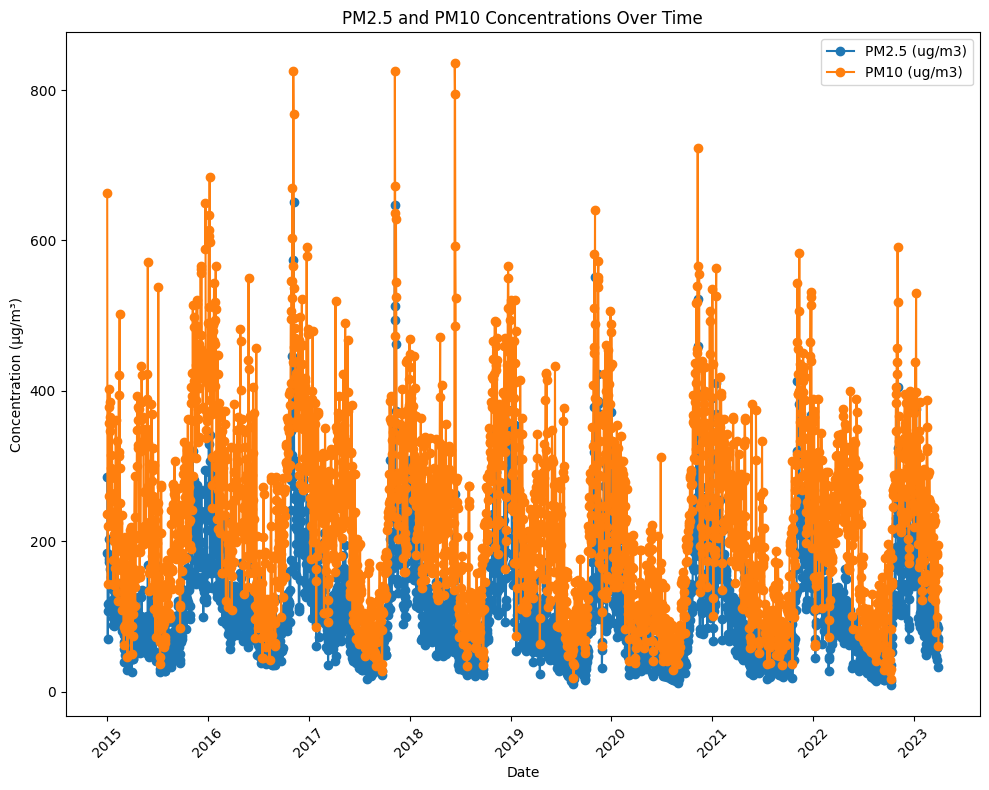

In [6]:
# Plotting the data
plt.figure(figsize=(10, 8))  # Set the figure size

# Plot 'pm2.5' and 'pm10' on the same plot
plt.plot(df['date'], df['PM2.5 (ug/m3)'], label='PM2.5 (ug/m3)', marker='o')
plt.plot(df['date'], df['PM10 (ug/m3)'], label='PM10 (ug/m3)', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.title('PM2.5 and PM10 Concentrations Over Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

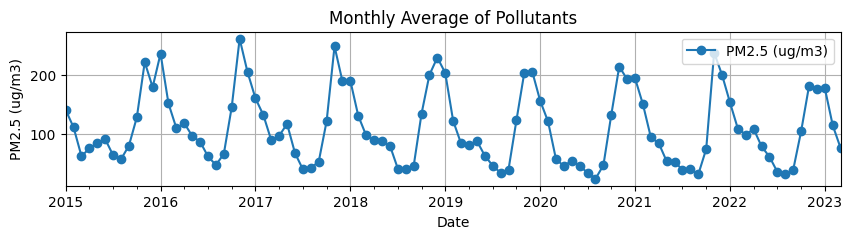

In [12]:
df_aqi = pd.read_csv("aqi_final/Delhi.csv")

df.set_index('date', inplace=True)

group_df = df.groupby(pd.Grouper(freq='1M')).mean(numeric_only=True)

group_df.plot(y=['PM2.5 (ug/m3)'], marker='o', figsize=(10, 2), title="Monthly Average of Pollutants")
plt.xlabel("Date")
plt.ylabel('PM2.5 (ug/m3)')
plt.grid()
plt.show()

In [ ]:
Inpatient Asthma, Chronic Obstructive Pulmonary Disease (Copd), Respiratory Infections

In [16]:
# cities = ["Bengaluru","Kochi","Hyderabad","Chennai","Mumbai","Lucknow","Kolkata","Guwahati","Delhi","Chandigarh","Amritsar","Ahmedabad"]
cities = ["Thiruvananthapuram"]

for city in cities:
    df_pollutants = pd.read_csv(f"aqi_mean/{city}.csv")
    df_aqi = pd.read_csv(f"aqi_data/{city}.csv")

    # merge tables
    df = pd.merge(df_pollutants, df_aqi, on='date', how='inner')

    # delete 'to date' column
    df = df.drop(columns=['No. Stations'])
                
    # rename 'from date' to 'date'
    df = df.rename(columns={'Index Value': 'aqi'})
    
    df.to_csv(f"aqi_final/{city}.csv",index=False)


/tmp/ipykernel_14695/377163943.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  group_df = df.groupby(pd.Grouper(freq='1M')).mean(numeric_only=True)


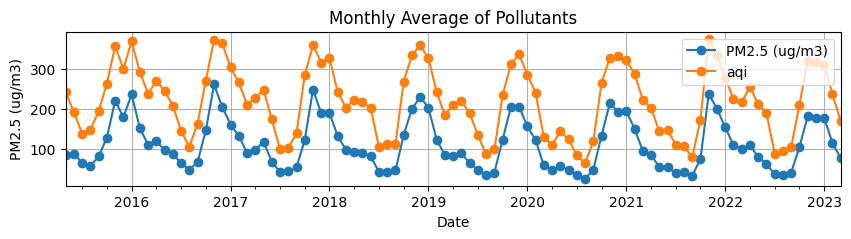

In [10]:
df = pd.read_csv(f"aqi_final/Delhi.csv")

df["date"] = pd.to_datetime(df["date"])
df.set_index('date', inplace=True)

group_df = df.groupby(pd.Grouper(freq='1M')).mean(numeric_only=True)

group_df.plot(y=['PM2.5 (ug/m3)','aqi'], marker='o', figsize=(10, 2), title="Monthly Average of Pollutants")
plt.xlabel("Date")
plt.ylabel('PM2.5 (ug/m3)')
plt.grid()
plt.show()

In [2]:
# Number Of Cases Of Children Admitted With Respiratory Infections (0-5 Years) (UOM:Number)
# Inpatient Asthma, Chronic Obstructive Pulmonary Disease (Copd), Respiratory Infections (UOM:Number)

df = pd.read_csv("ndap_respiratory.csv")

df = df[['Country', 'State', 'District', 'Sub-District', 'Year', 'Month',
       'Type Of Facility',
         'Inpatient Asthma, Chronic Obstructive Pulmonary Disease (Copd), Respiratory Infections (UOM:Number)',
         'Number Of Cases Of Children Admitted With Respiratory Infections (0-5 Years) (UOM:Number)']]

df = df.rename(columns={'Inpatient Asthma, Chronic Obstructive Pulmonary Disease (Copd), Respiratory Infections (UOM:Number)': 'Number of patients'})
df = df.rename(columns={'Number Of Cases Of Children Admitted With Respiratory Infections (0-5 Years) (UOM:Number)': 'Number of patients 0-5'})

df.to_csv("respiratory.csv",index=False)

In [18]:
# cities = ["Bengaluru","Kochi","Hyderabad","Chennai","Mumbai","Lucknow","Kolkata","Guwahati","Delhi","Chandigarh","Amritsar","Ahmedabad"]
cities = ["Ahmedabad","Guwahati"]

# df_resp = pd.read_csv("respiratory.csv")

# for city in cities:
#     df = df_resp[df_resp['District'].str.contains(city, case=False, na=False)].copy()
#     df = df.groupby(['Year','Month']).sum(numeric_only=True).reset_index()
#     df['City']=city
#     df.to_csv(f"respiratory/{city}.csv")
# df

for city in cities:
    df = pd.read_csv(f"respiratory/{city}.csv")
    df = df.drop(columns=['City'])
    df['City']=city
    df.to_csv(f"respiratory/{city}.csv")
    
    


In [9]:
df

,Year,Month,Number of patients,Number of patients 0-5,City
0,2020,April,406.0,138.0,Bengaluru
1,2020,August,1853.0,44.0,Bengaluru
2,2020,December,765.0,68.0,Bengaluru
3,2020,July,935.0,63.0,Bengaluru
4,2020,June,852.0,69.0,Bengaluru
5,2020,May,554.0,94.0,Bengaluru
6,2020,November,1469.0,59.0,Bengaluru
7,2020,October,2136.0,49.0,Bengaluru
8,2020,September,2625.0,44.0,Bengaluru
9,2021,April,2995.0,143.0,Bengaluru


In [18]:
df[df['State']=='Delhi']

,Country,State,District,Sub-District,Year,Month,Type Of Facility,Number of patients
89994,India,Delhi,Central,Civil Lines,"Financial Year (Apr - Mar), 2020","April, 2020",Private,39.0
89995,India,Delhi,Central,Civil Lines,"Financial Year (Apr - Mar), 2020","April, 2020",Public,1.0
89996,India,Delhi,Central,Civil Lines,"Financial Year (Apr - Mar), 2020","August, 2020",Private,24.0
89997,India,Delhi,Central,Civil Lines,"Financial Year (Apr - Mar), 2020","August, 2020",Public,6.0
89998,India,Delhi,Central,Civil Lines,"Financial Year (Apr - Mar), 2020","December, 2020",Private,93.0
...,...,...,...,...,...,...,...,...
91573,India,Delhi,West,Rajouri Garden,"Financial Year (Apr - Mar), 2021","November, 2021",Public,0.0
91574,India,Delhi,West,Rajouri Garden,"Financial Year (Apr - Mar), 2021","October, 2021",Private,20.0
91575,India,Delhi,West,Rajouri Garden,"Financial Year (Apr - Mar), 2021","October, 2021",Public,0.0
91576,India,Delhi,West,Rajouri Garden,"Financial Year (Apr - Mar), 2021","September, 2021",Private,36.0


In [3]:
df[['Month','Year']] = df['Month'].str.split(', ', expand=True)
df.to_csv("respiratory.csv",index=False)

In [2]:
df_aqi = pd.read_csv("aqi_final/Delhi.csv")
df_resp = pd.read_csv("respiratory.csv")

# print(df_aqi.columns)
# print(df_resp.columns)

In [3]:
# Filter rows where State is Delhi
df_resp = df_resp[df_resp['State'].str.contains("Delhi", case=False, na=False)].copy()

df_resp = df_resp.groupby(['Year','Month']).sum(numeric_only=True).reset_index()

df_resp['City']='Delhi'

df_resp

,Year,Month,Number of patients,Number of patients 0-5,City
0,2020,April,611.0,133.0,Delhi
1,2020,August,1843.0,146.0,Delhi
2,2020,December,1859.0,134.0,Delhi
3,2020,July,1012.0,132.0,Delhi
4,2020,June,1124.0,94.0,Delhi
5,2020,May,784.0,107.0,Delhi
6,2020,November,2897.0,231.0,Delhi
7,2020,October,1633.0,354.0,Delhi
8,2020,September,1580.0,208.0,Delhi
9,2021,April,3239.0,371.0,Delhi


In [ ]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

cities = ["Bengaluru","Hyderabad","Chennai","Mumbai","Lucknow","Kolkata","Guwahati","Delhi","Chandigarh","Amritsar","Ahmedabad","Thiruvananthapuram"]

df_merged = []

for city in cities:
    df_resp = pd.read_csv(f"respiratory/{city}.csv")
    df_aqi = pd.read_csv(f"aqi_final/{city}.csv")

    df_resp['month_numeric'] = df_resp['Month'].map(month_mapping)

    # Convert 'date' to datetime
    df_aqi["date"] = pd.to_datetime(df_aqi["date"])
    df_aqi.set_index('date', inplace=True)
    
    df_aqi_month = df_aqi.groupby(pd.Grouper(freq='1M')).mean(numeric_only=True).copy()
    
    df_aqi_month.reset_index(inplace=True)
    
    df_aqi_month['month_numeric'] = df_aqi_month['date'].dt.month
    df_aqi_month['Year'] = df_aqi_month['date'].dt.year
    
    # merge tables
    merged_df = pd.merge(df_resp, df_aqi_month, on=['month_numeric','Year'], how='inner')
    
    merged_df = merged_df.reset_index()
    # merged_df['date'] = pd.to_datetime(merged_df['date'])
    
    # Sort the DataFrame by the 'date' column
    # merged_df = merged_df.sort_values(by='date')
    
    # merged_df.set_index('date', inplace=True)

    merged_df.to_csv(f"merged/{city}.csv",index=False)

    df_merged.append(merged_df)



In [24]:
# df = pd.concat(df_merged, ignore_index=True)

# Calculate covariance between 'aqi' and 'Number of patients'
covariance = df['Number of patients'].cov(df['aqi'])

print("Covariance:", covariance)

Covariance: -4696.362150857231


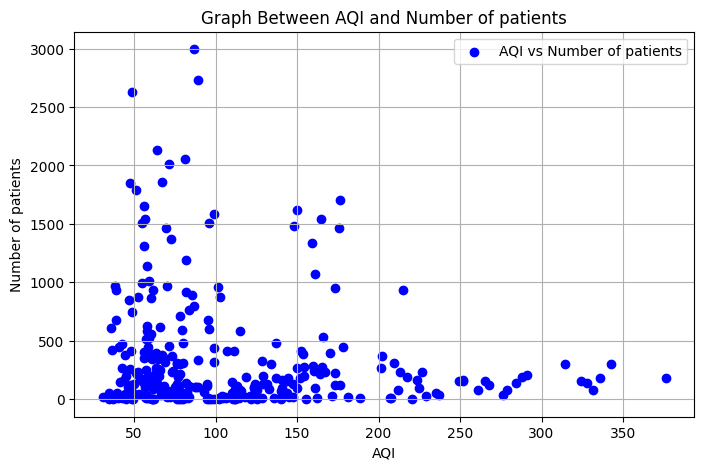

In [28]:
# Plot the graph
plt.figure(figsize=(8, 5))
plt.scatter(df['aqi'], df['Number of patients'], marker='o', linestyle='-', color='b', label='AQI vs Number of patients')

# Add labels and title
plt.xlabel('AQI')
plt.ylabel('Number of patients')
plt.title('Graph Between AQI and Number of patients')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df_resp['month_numeric'] = df_resp['Month'].map(month_mapping)

# Convert 'date' to datetime
df_aqi["date"] = pd.to_datetime(df_aqi["date"])
df_aqi.set_index('date', inplace=True)

df_aqi_month = df_aqi.groupby(pd.Grouper(freq='1M')).mean(numeric_only=True).copy()

df_aqi_month.reset_index(inplace=True)

df_aqi_month['month_numeric'] = df_aqi_month['date'].dt.month
df_aqi_month['Year'] = df_aqi_month['date'].dt.year

# merge tables
merged_df = pd.merge(df_resp, df_aqi_month, on=['month_numeric','Year'], how='inner')

merged_df = merged_df.reset_index()
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Sort the DataFrame by the 'date' column
merged_df = merged_df.sort_values(by='date')

merged_df.set_index('date', inplace=True)

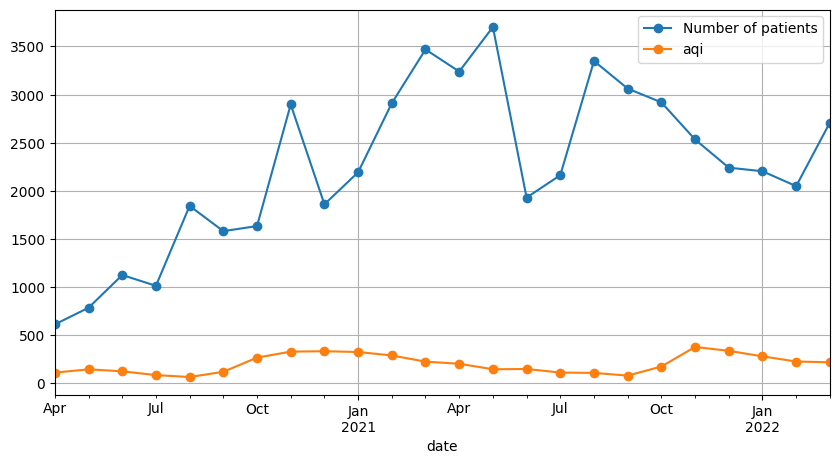

In [36]:


merged_df.plot(y=['Number of patients','aqi'], marker='o', figsize=(10, 5))
# plt.xlabel("Date")
# plt.ylabel('PM2.5 (ug/m3)')
plt.grid()
plt.show()

In [32]:
merged_df = merged_df.reset_index()
# merged_df.to_csv("merged_df.csv",index=False)

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df.set_index('date', inplace=True)

group_df = df.groupby(pd.Grouper(freq='1M')).mean(numeric_only=True)

group_df.plot(y=['PM2.5 (ug/m3)','aqi'], marker='o', figsize=(10, 2), title="Monthly Average of Pollutants")
plt.xlabel("Date")
plt.ylabel('PM2.5 (ug/m3)')
plt.grid()
plt.show()

In [8]:
# Create a regex pattern from the list of substrings
# pattern = '|'.join(['Mumbai'])

# Filter rows where any substring is found in the 'city' column
filtered_df = df[df['District'].str.contains("Mumbai", case=False, na=False)].copy()

filtered_df = filtered_df.groupby(['Year','Month']).sum(numeric_only=True).reset_index()

filtered_df['City']='Mumbai'

filtered_df

,Year,Month,Number of patients,Number of patients 0-5,City
0,2020,April,967.0,92.0,Mumbai
1,2020,August,607.0,19.0,Mumbai
2,2020,December,956.0,200.0,Mumbai
3,2020,July,675.0,32.0,Mumbai
4,2020,June,965.0,23.0,Mumbai
5,2020,May,992.0,29.0,Mumbai
6,2020,November,384.0,65.0,Mumbai
7,2020,October,598.0,63.0,Mumbai
8,2020,September,586.0,30.0,Mumbai
9,2021,April,1586.0,65.0,Mumbai


**Distribution of PM2.5 by Month and Year**

In [32]:
df = pd.read_csv("aqi_final/Delhi.csv")
df.columns

Index(['index', 'date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'Xylene (ug/m3)', 'AT (degree C)',
       'MP-Xylene ()', 'RF (mm)', 'AT ()', 'WD (degree)', 'CH4 (ug/m3)',
       'NMHC (ug/m3)', 'THC (ug/m3)', 'Gust (km/hr)', 'Variance (n)',
       'Power (W)', 'CO2 (mg/m3)', 'Ozone (ppb)', 'Gust (kl/h)', 'Gust (m/s)',
       'WS ()', 'SPM (ug/m3)', 'MH (m)', 'HCHO (ug/m3)', 'Hg (ug/m3)',
       'CO (ug/m3)', 'Toluene ()', 'CO (ng/m3)', 'NOx (ug/m3)',
       'WD (degree C)', 'Benzene ()', 'SR ()', 'Temp (ug/m3)', 'WD ()',
       'SO2 ()', 'RH ()', 'BP ()', 'Eth-Benzene ()', 'Xylene ()', 'CH4 ()',
       'City', 'Air Quality', 'aqi', 'Prominent Pollutant'],
      dty

In [34]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()

,index,date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,BP (),Eth-Benzene (),Xylene (),CH4 (),City,Air Quality,aqi,Prominent Pollutant,month,year
0,120,2015-05-01,78.441759,186.479333,14.940093,34.147308,51.483876,26.239184,11.953070,4.922229,...,NaN,NaN,NaN,NaN,Delhi,Poor,221,O3,5,2015
1,121,2015-05-02,59.437639,210.357361,24.938423,54.843274,73.733769,27.515909,14.851224,6.245342,...,NaN,NaN,NaN,NaN,Delhi,Poor,238,"O3, PM2.5",5,2015
2,122,2015-05-03,100.336736,319.616790,52.722199,75.994192,108.148802,33.938444,17.303921,7.336690,...,NaN,NaN,NaN,NaN,Delhi,Poor,259,"O3, PM10",5,2015
3,123,2015-05-04,96.533611,329.623472,49.980940,73.503651,104.220608,33.751452,14.991650,6.873351,...,NaN,NaN,NaN,NaN,Delhi,Poor,289,"O3, PM10",5,2015
4,124,2015-05-05,126.244376,432.743194,63.226896,101.751635,141.586312,36.631960,25.258060,7.157288,...,NaN,NaN,NaN,NaN,Delhi,Very poor,311,"O3, PM10, PM2.5",5,2015


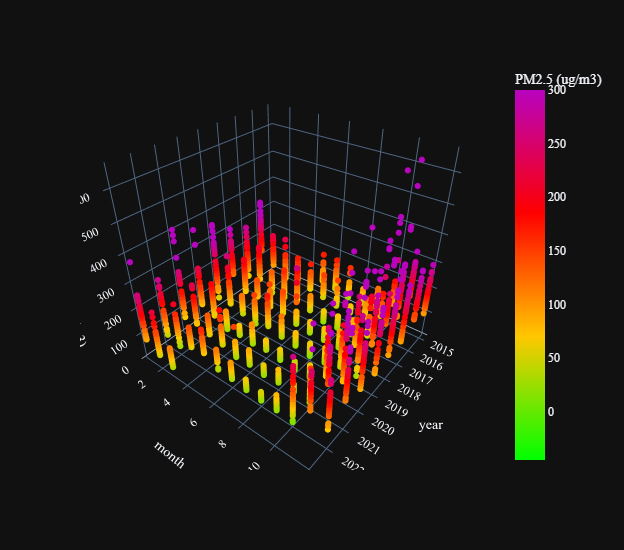

In [40]:
# import plotly.express as px

fig = px.scatter_3d(df, x = "year", y = "month", z = "PM2.5 (ug/m3)",
                    color = "PM2.5 (ug/m3)", color_continuous_scale = ["#00FF00", "#FFC800", "#FF0000", "#B803BF"], 
                    range_color = (-45, 300)) # range of color bar

fig.update_traces(marker = dict(size = 3.5)) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12), width=800, height=550)
fig.show()

In [4]:
cities = ["Bengaluru","Hyderabad","Chennai","Mumbai","Lucknow","Kolkata","Guwahati","Delhi","Chandigarh","Amritsar","Ahmedabad","Thiruvananthapuram"]

df = pd.read_csv("aqi_final/Bengaluru.csv")

In [5]:
df.columns

Index(['index', 'date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'CH4 (ug/m3)', 'NMHC ()', 'THC (ug/m3)',
       'AT (degree C)', 'THC ()', 'NMHC (ug/m3)', 'NOx (ug/m3)', 'WD (degree)',
       'CH4 ()', 'RF (mm)', 'Xylene (ug/m3)', 'CO (ug/m3)', 'RH (W/mt2)',
       'City', 'Air Quality', 'aqi', 'Prominent Pollutant'],
      dtype='object')

In [6]:
dfs = []

for city in cities:
    df = pd.read_csv(f"aqi_final/{city}.csv")
    dfs.append(df)

df = pd.concat(dfs,ignore_index=True)

df

    

,index,date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,WD (degree C),Benzene (),SR (),Temp (ug/m3),WD (),SO2 (),BP (),Eth-Benzene (),Xylene (),AT (degree)
0,121,2015-05-02,35.459993,NaN,4.139505,10.789938,14.702176,21.972500,4.223113,11.377952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122,2015-05-03,105.161405,NaN,4.863947,13.707673,19.204743,16.262105,10.064064,6.913889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123,2015-05-04,29.977621,NaN,3.822029,18.309912,16.848750,16.848333,4.553889,6.367101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,124,2015-05-05,26.001056,NaN,6.929583,15.372546,15.610139,6.103333,7.407451,6.069286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125,2015-05-06,28.068592,NaN,5.919535,11.794838,13.371055,10.267500,10.164501,17.081667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28036,2110,2023-03-27,15.663524,45.086458,5.286042,13.422292,15.338750,6.570000,3.920141,0.222083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28037,2111,2023-03-28,21.054167,65.648750,5.244583,13.444583,15.261875,6.519792,3.504022,0.436458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28038,2112,2023-03-29,24.637500,65.193250,5.304583,13.426875,15.179375,6.547292,4.256364,0.335208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28039,2113,2023-03-30,21.737833,65.014333,5.257708,13.477208,15.347125,6.509792,3.637436,0.321583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


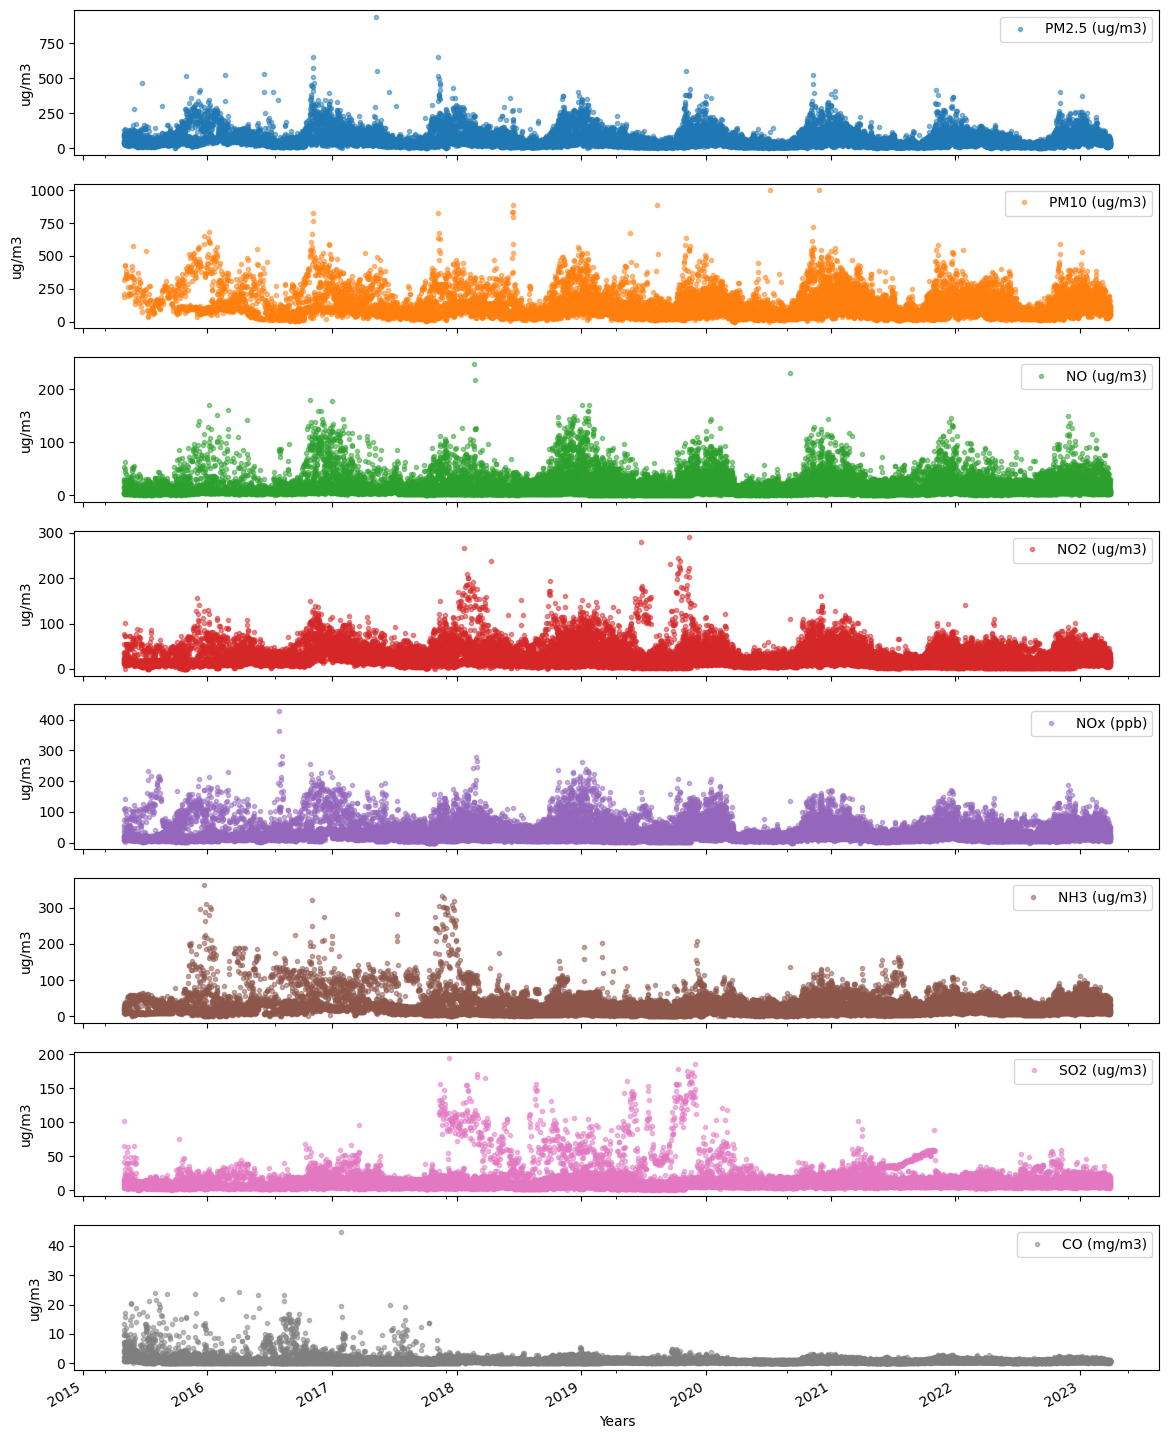

In [8]:
df['date'] = pd.to_datetime(df['date'])

pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

axes = df.set_index('date')[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 20), subplots=True)

for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug/m3')

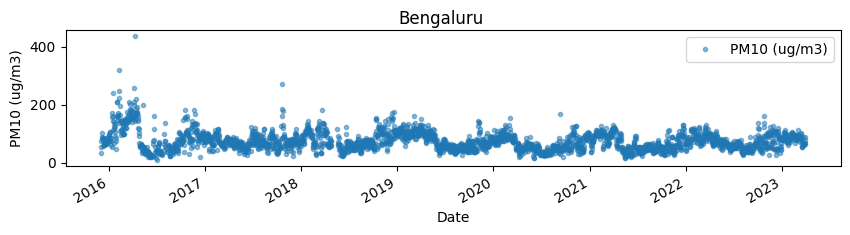

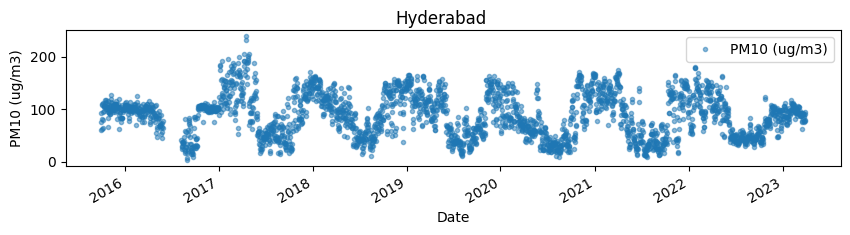

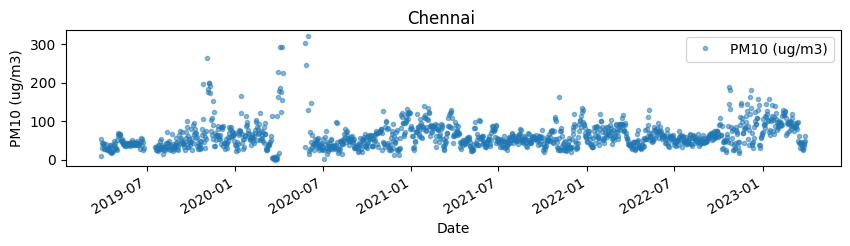

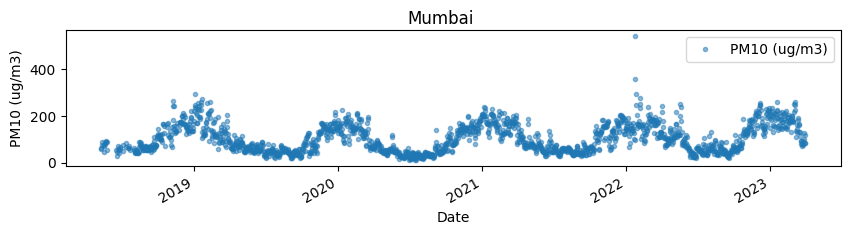

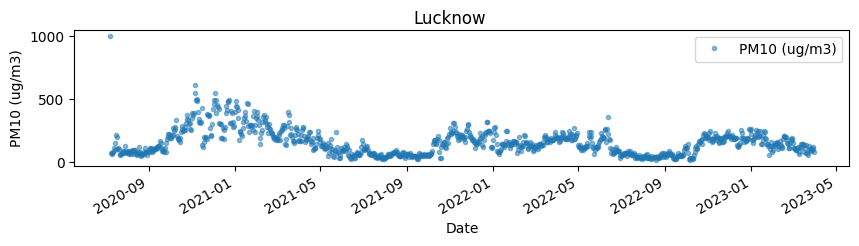

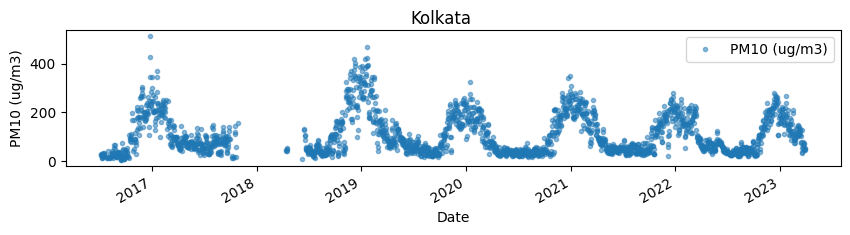

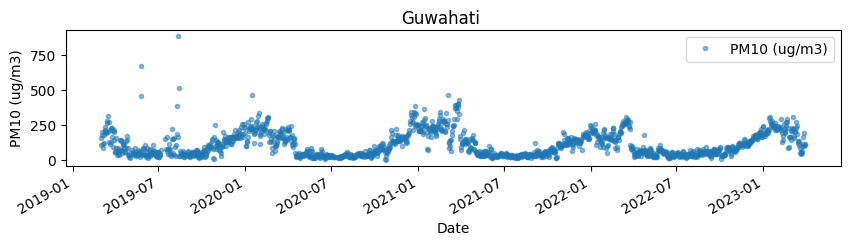

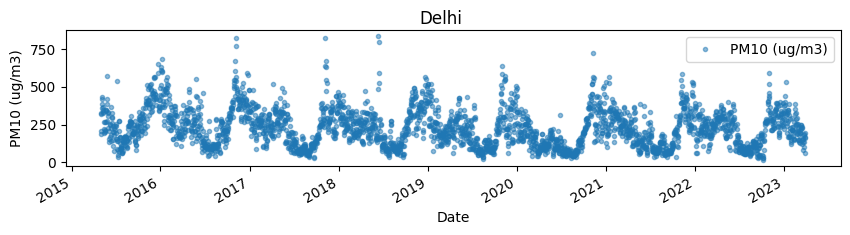

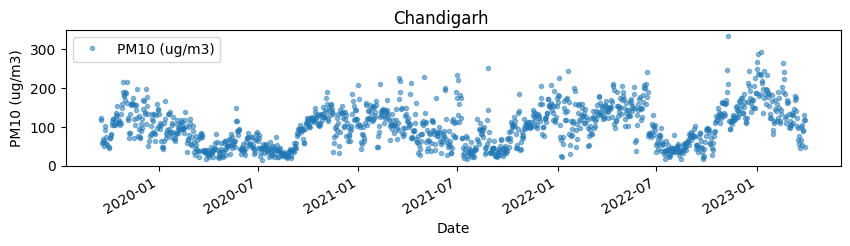

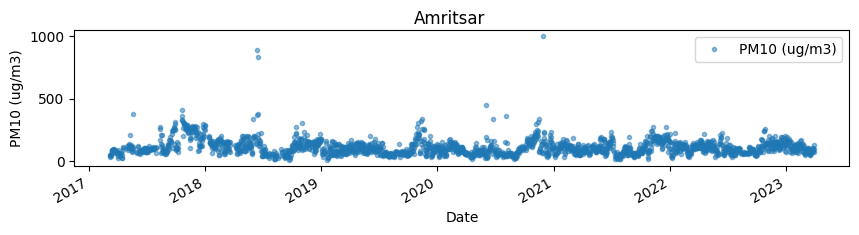

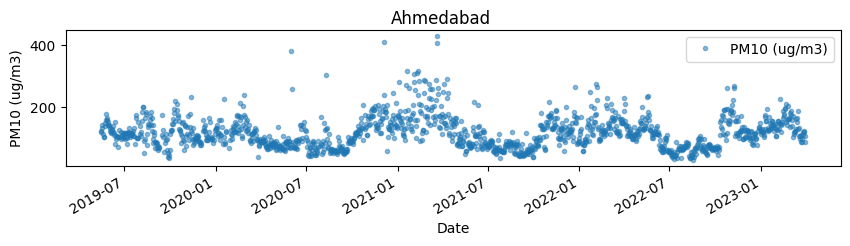

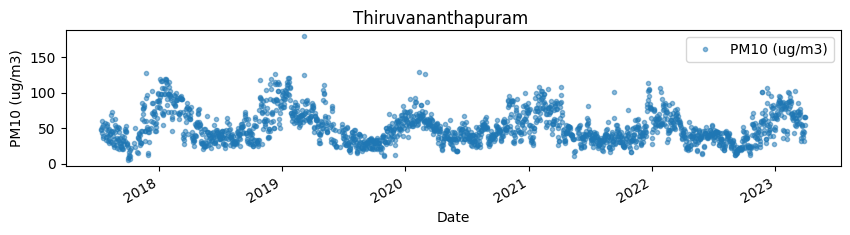

In [10]:
cities = ["Bengaluru","Hyderabad","Chennai","Mumbai","Lucknow","Kolkata","Guwahati","Delhi","Chandigarh","Amritsar","Ahmedabad","Thiruvananthapuram"]

pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

for city in cities:
    df = pd.read_csv(f"aqi_final/{city}.csv")
    df["date"] = pd.to_datetime(df["date"])
    df.set_index('date', inplace=True)
    
    # group_df = df.groupby(pd.Grouper(freq='1M')).mean(numeric_only=True)
    
    axes = df.plot(y=['PM10 (ug/m3)'], marker='.', alpha=0.5, linestyle='None', figsize=(10, 2), title=city, subplots=True)
    
    for ax in axes:
        ax.set_xlabel("Date")
        ax.set_ylabel('PM10 (ug/m3)')

    

In [10]:
cities = ["Bengaluru","Hyderabad","Chennai","Mumbai","Lucknow","Kolkata","Guwahati","Delhi","Chandigarh","Amritsar","Ahmedabad","Thiruvananthapuram"]

pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

dfs=[]

for city in cities:
    df=pd.read_csv(f"aqi_final/{city}.csv")
    # df=[[df['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
    #    'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']]]
    df.set_index('date')
    dfs.append(df)
    
df = pd.concat(dfs)   
df

,index,date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,WD (degree C),Benzene (),SR (),Temp (ug/m3),WD (),SO2 (),BP (),Eth-Benzene (),Xylene (),AT (degree)
0,121,2015-05-02,35.459993,NaN,4.139505,10.789938,14.702176,21.972500,4.223113,11.377952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122,2015-05-03,105.161405,NaN,4.863947,13.707673,19.204743,16.262105,10.064064,6.913889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123,2015-05-04,29.977621,NaN,3.822029,18.309912,16.848750,16.848333,4.553889,6.367101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,124,2015-05-05,26.001056,NaN,6.929583,15.372546,15.610139,6.103333,7.407451,6.069286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125,2015-05-06,28.068592,NaN,5.919535,11.794838,13.371055,10.267500,10.164501,17.081667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,2110,2023-03-27,15.663524,45.086458,5.286042,13.422292,15.338750,6.570000,3.920141,0.222083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026,2111,2023-03-28,21.054167,65.648750,5.244583,13.444583,15.261875,6.519792,3.504022,0.436458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2027,2112,2023-03-29,24.637500,65.193250,5.304583,13.426875,15.179375,6.547292,4.256364,0.335208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028,2113,2023-03-30,21.737833,65.014333,5.257708,13.477208,15.347125,6.509792,3.637436,0.321583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.columns

Index(['index', 'date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'CH4 (ug/m3)', 'NMHC ()', 'THC (ug/m3)',
       'AT (degree C)', 'THC ()', 'NMHC (ug/m3)', 'NOx (ug/m3)', 'WD (degree)',
       'CH4 ()', 'RF (mm)', 'Xylene (ug/m3)', 'CO (ug/m3)', 'RH (W/mt2)',
       'City', 'Air Quality', 'aqi', 'Prominent Pollutant', 'Ozone ()',
       'RH ()', 'MP-Xylene ()', 'AT ()', 'Gust (km/hr)', 'Variance (n)',
       'Power (W)', 'CO2 (mg/m3)', 'Ozone (ppb)', 'Gust (kl/h)', 'Gust (m/s)',
       'WS ()', 'SPM (ug/m3)', 'MH (m)', 'HCHO (ug/m3)', 'Hg (ug/m3)',
       'Toluene ()', 'CO (ng/m3)', 'WD (degree C)', 'Benzene ()', 'SR ()',
       'Temp (ug/m3)', 'WD ()', 'SO2 ()', 'BP

In [14]:
df.to_csv("aqi_data.csv",index=False)
df1=pd.read_csv("aqi_data.csv")
df1.head()

,index,date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,WD (degree C),Benzene (),SR (),Temp (ug/m3),WD (),SO2 (),BP (),Eth-Benzene (),Xylene (),AT (degree)
0,121,2015-05-02,35.459993,NaN,4.139505,10.789938,14.702176,21.972500,4.223113,11.377952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122,2015-05-03,105.161405,NaN,4.863947,13.707673,19.204743,16.262105,10.064064,6.913889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123,2015-05-04,29.977621,NaN,3.822029,18.309912,16.848750,16.848333,4.553889,6.367101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,124,2015-05-05,26.001056,NaN,6.929583,15.372546,15.610139,6.103333,7.407451,6.069286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125,2015-05-06,28.068592,NaN,5.919535,11.794838,13.371055,10.267500,10.164501,17.081667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1['City'].